![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Transfer Learning

## TOC
- Import libraries
- Load and Visualize Dataset
- Data exploration and preparation
- CNN Model
- Transfer learning using VGG16
- Transfer learning using Resnet
- Transfer learning using MobileNet
- Transfer learning using DenseNet
- Conclusion

## Import Libraries

In [ ]:
# Importing tensorflow and verifying its version
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.6.0'

In [ ]:
#Important libraries for data manipulation
# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
# Pandas is used for data manipulation and analysis
import numpy as np
import pandas as pd

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
import matplotlib.pyplot as plt

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os
import random
import pickle

# Sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Libraries for working with images and CNN
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

from tensorflow.keras.applications import ResNet50, VGG16, VGG19, MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input as prepro_res50

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount google drive
#from google.colab import drive
#drive.mount('/content/gdrive')

## Load and Visualize Dataset 


In [ ]:
# Load the dataset
from tensorflow.keras.datasets import cifar10
(train_X,train_Y), (test_X,test_Y) = cifar10.load_data() 
train_X.shape, test_X.shape

170508288/170498071 [==============================] - 6s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
train_Y.shape, test_Y.shape

((50000, 1), (10000, 1))

In [ ]:
# Check shape and size of the independent data
print("Shape of train data:",train_X.shape)
print("Shape of test data::",test_X.shape)

Shape of train data: (50000, 32, 32, 3)
Shape of test data:: (10000, 32, 32, 3)


In [ ]:
# Check shape and size of the label data
train_Y.shape, test_Y.shape

((50000, 1), (10000, 1))

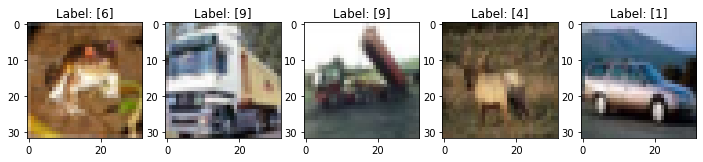

In [ ]:
# Visualize the images along with their labels
def show_img(count, data, label):
    fig, axs = plt.subplots(1, count, figsize=(12, 8))
    for i in range(0, count):
        axs[i].imshow(data[i], label=label[i])
        axs[i].set_title('Label: {}'.format(label[i]))
        
show_img(5, train_X, train_Y)

plt.show()

## Data exploration and preparation


### Get the count for each label

In [ ]:
train_label = pd.DataFrame(train_Y, columns = ['Label'])
train_label['Label'].value_counts()

9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
Name: Label, dtype: int64

- The classes are equaly distributed in the train set

### Standardization

In [ ]:
print(train_X.shape)
print(test_X.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
train_X[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [ ]:
# scale the raw pixel intensities to the range [0, 1]
train_X_std = train_X / 255.0
test_X_std = test_X / 255.0

In [ ]:
# Check few values
train_X_std.shape

(50000, 32, 32, 3)

In [ ]:
# Check few values
test_X_std[0][10]

array([[0.71764706, 0.71764706, 0.68627451],
       [0.42352941, 0.45490196, 0.47843137],
       [0.55686275, 0.59215686, 0.61960784],
       [0.64705882, 0.6627451 , 0.65882353],
       [0.69411765, 0.61176471, 0.47843137],
       [0.60784314, 0.43921569, 0.19607843],
       [0.62352941, 0.4627451 , 0.2       ],
       [0.47843137, 0.34901961, 0.18431373],
       [0.83529412, 0.77254902, 0.70196078],
       [0.92941176, 0.87843137, 0.88627451],
       [0.8627451 , 0.74901961, 0.7372549 ],
       [0.64313725, 0.52941176, 0.51372549],
       [0.71764706, 0.62352941, 0.60784314],
       [0.61176471, 0.5372549 , 0.51764706],
       [0.49019608, 0.42352941, 0.40784314],
       [0.47058824, 0.43529412, 0.40784314],
       [0.30588235, 0.29803922, 0.27058824],
       [0.31372549, 0.31372549, 0.30196078],
       [0.17647059, 0.17254902, 0.15686275],
       [0.35686275, 0.33333333, 0.30196078],
       [0.68627451, 0.64705882, 0.60392157],
       [0.61568627, 0.57647059, 0.5372549 ],
       [0.

In [ ]:
# save encoded targets
from tensorflow.keras.utils import to_categorical
NUM_CLASSES =10
train_Y_cat = to_categorical(train_Y, NUM_CLASSES)
test_Y_cat = to_categorical(test_Y, NUM_CLASSES)

In [ ]:
print(train_Y_cat.shape)
print(test_Y_cat.shape)

(50000, 10)
(10000, 10)


## CNN Model

In [ ]:
### Define variables

IMG_ROWS = 32
IMG_COLS = 32
NUM_CLASSES = 10
TEST_SIZE = 0.3
RANDOM_STATE = 42

### Model
NO_EPOCHS = 50
BATCH_SIZE = 32
input_shape = (32, 32, 3)

In [ ]:
model_cnn = Sequential()
# Add convolution 2D
model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(128, activation='relu'))

## Output layer
model_cnn.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [ ]:
# initialize the model and optimizer (you'll want to use categorical_crossentropy for multi-class classification)
sgd= optimizers.SGD(lr= 0.001,momentum=.9)
rms = optimizers.RMSprop()
model_cnn.compile(loss="categorical_crossentropy", optimizer=sgd,	metrics=["accuracy"])

In [ ]:
import time
start_time = time.time()
cnn_history = model_cnn.fit(train_X_std, train_Y_cat, batch_size =BATCH_SIZE, epochs= 25,
                            validation_data=(test_X_std,test_Y_cat))

print("****** %s seconds" % (time.time() - start_time))

Epoch 1/25
1563/1563 [==============================] - 49s 11ms/step - loss: 2.1001 - accuracy: 0.2030 - val_loss: 1.7882 - val_accuracy: 0.3379
Epoch 2/25
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7198 - accuracy: 0.3621 - val_loss: 1.5201 - val_accuracy: 0.4451
Epoch 3/25
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5306 - accuracy: 0.4406 - val_loss: 1.3590 - val_accuracy: 0.5012
Epoch 4/25
1563/1563 [==============================] - 16s 11ms/step - loss: 1.4051 - accuracy: 0.4910 - val_loss: 1.3294 - val_accuracy: 0.5094
Epoch 5/25
1563/1563 [==============================] - 16s 11ms/step - loss: 1.3215 - accuracy: 0.5247 - val_loss: 1.2149 - val_accuracy: 0.5564
Epoch 6/25
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2504 - accuracy: 0.5519 - val_loss: 1.1851 - val_accuracy: 0.5690
Epoch 7/25
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1853 - accuracy: 0.5769 - val_loss: 1.1672 -

In [ ]:
results = model_cnn.evaluate(test_X_std, test_Y_cat)
print('Test accuracy: ', results[1])

# evaluate the network
from sklearn.metrics import classification_report, confusion_matrix

pred = model_cnn.predict(test_X_std, batch_size=32)

print(confusion_matrix(test_Y_cat.argmax(axis=1), pred.argmax(axis=1))) 

313/313 [==============================] - 2s 5ms/step - loss: 0.8141 - accuracy: 0.7317
Test accuracy:  0.7317000031471252
[[780  14  59  29  28   2   9  13  42  24]
 [ 33 832   9  14   8   7  18   4  20  55]
 [ 60   2 647  78  93  49  37  26   5   3]
 [ 18   3  84 615  73 122  47  27   4   7]
 [ 12   1  65  55 748  19  44  50   6   0]
 [  5   3  53 213  56 611  13  42   1   3]
 [  4   6  55  71  45  16 797   2   3   1]
 [ 12   0  40  48  88  59   6 744   0   3]
 [ 75  27  17  27   9   7   4   3 809  22]
 [ 49  82  10  28  10  10  12  33  32 734]]


In [ ]:
from sklearn.metrics import f1_score
f1_score(test_Y, pred.argmax(axis=1), average = 'weighted')

0.7343602488938222

## Transfer Learning using VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

#Load the VGG model
img_input = (32, 32, 3)
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=img_input)

# Freeze all the layers except for the last few layers: 
for layer in vgg_conv.layers[:-5]:
    layer.trainable = False
 
 
# Create the model
model_vgg = Sequential()
 
# Add the vgg convolutional base model
model_vgg.add(vgg_conv)
 
# Add new layers
model_vgg.add(Flatten())
model_vgg.add(Dense(512, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dropout(0.3))
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dropout(0.3))

# Output layer
model_vgg.add(Dense(10, activation='softmax'))
model_vgg.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [ ]:
# initialize the model and optimizer
sgd= optimizers.SGD(lr= 0.001,momentum=.9)
model_vgg.compile(loss="categorical_crossentropy", optimizer=sgd,
                  metrics=["accuracy"])

In [ ]:
import time
start_time = time.time()

vgg_history = model_vgg.fit(train_X_std, train_Y_cat, batch_size =BATCH_SIZE, epochs= 25,
                            validation_data=(test_X_std,test_Y_cat))

print("%s seconds" % (time.time() - start_time))

Epoch 1/25
1563/1563 [==============================] - 60s 33ms/step - loss: 1.8995 - accuracy: 0.2779 - val_loss: 1.3512 - val_accuracy: 0.5021
Epoch 2/25
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3048 - accuracy: 0.5390 - val_loss: 1.1461 - val_accuracy: 0.6036
Epoch 3/25
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1125 - accuracy: 0.6268 - val_loss: 0.9909 - val_accuracy: 0.6618
Epoch 4/25
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0064 - accuracy: 0.6678 - val_loss: 0.9169 - val_accuracy: 0.6980
Epoch 5/25
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9288 - accuracy: 0.6984 - val_loss: 0.8786 - val_accuracy: 0.7055
Epoch 6/25
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8622 - accuracy: 0.7208 - val_loss: 0.8764 - val_accuracy: 0.7090
Epoch 7/25
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8152 - accuracy: 0.7377 - val_loss: 0.8568 -

In [ ]:
results = model_vgg.evaluate(test_X_std, test_Y_cat)

# evaluate the network
from sklearn.metrics import classification_report, confusion_matrix

pred_vgg = model_vgg.predict(test_X_std, batch_size=32)

print(confusion_matrix(test_Y_cat.argmax(axis=1), pred_vgg.argmax(axis=1))) 

313/313 [==============================] - 6s 19ms/step - loss: 1.0794 - accuracy: 0.7444
[[793  16  32   9  17   4  12   8  86  23]
 [ 10 827   9   6   0   6   9   2  44  87]
 [ 51   6 690  24  78  28  79  27   9   8]
 [ 19  12  63 395  56 218 112  75  21  29]
 [ 14   2  65  29 706  37  52  71  10  14]
 [ 10   4  42 113  34 663  42  76   5  11]
 [  7   4  38  26  45  18 837   4  12   9]
 [ 13   3  24  12  49  38  12 828   2  19]
 [ 33  22  11   2  13   3   4   1 895  16]
 [ 25  73   5  10   6   7   5  18  41 810]]


## Transfer Learning using ResNet50

In [ ]:
#from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50

res_model = Sequential()

res = ResNet50(include_top=False, weights='imagenet',input_shape = (32, 32, 3))

res_model.add(res)
           
# Add new layers
res_model.add(Flatten())
res_model.add(Dense(512, activation='relu'))
res_model.add(Dropout(0.5))
res_model.add(Dense(256, activation='relu'))
res_model.add(Dropout(0.5))
res_model.add(Dense(128, activation='relu'))
res_model.add(Dropout(0.3))
# Output layer
res_model.add(Dense(10, activation='softmax'))

res_model.summary()     

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)              

In [ ]:
res_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
train_X_std_res = preprocess_input(train_X)
test_X_std_res = preprocess_input(test_X)

In [ ]:
import time
start_time = time.time()
res_history = res_model.fit(train_X_std_res, train_Y_cat, batch_size =100, epochs= 25,
                            validation_data=(test_X_std_res,test_Y_cat))

print("****** %s seconds" % (time.time() - start_time))

Epoch 1/25
500/500 [==============================] - 129s 245ms/step - loss: 2.2030 - accuracy: 0.2176 - val_loss: 1.6965 - val_accuracy: 0.3899
Epoch 2/25
500/500 [==============================] - 73s 147ms/step - loss: 1.5484 - accuracy: 0.4256 - val_loss: 1.2992 - val_accuracy: 0.5245
Epoch 3/25
500/500 [==============================] - 75s 151ms/step - loss: 1.2452 - accuracy: 0.5619 - val_loss: 1.1113 - val_accuracy: 0.6198
Epoch 4/25
500/500 [==============================] - 74s 148ms/step - loss: 1.1922 - accuracy: 0.6054 - val_loss: 1.1964 - val_accuracy: 0.5972
Epoch 5/25
500/500 [==============================] - 75s 151ms/step - loss: 1.0712 - accuracy: 0.6515 - val_loss: 1.4212 - val_accuracy: 0.4998
Epoch 6/25
500/500 [==============================] - 73s 147ms/step - loss: 0.9649 - accuracy: 0.6894 - val_loss: 1.3205 - val_accuracy: 0.6112
Epoch 7/25
500/500 [==============================] - 75s 151ms/step - loss: 0.9130 - accuracy: 0.7143 - val_loss: 1.6566 - val_a

In [ ]:
# evaluate the network
pred_res = res_model.predict(test_X_std_res, batch_size=32)

print(confusion_matrix(test_Y_cat.argmax(axis=1),pred_res.argmax(axis=1)))

[[846  26  36  10   8   3   4  10  28  29]
 [ 20 875   4   9   0   2   7   2  14  67]
 [ 54   2 762  27  47  33  41  27   5   2]
 [ 35   8  68 572  61 122  73  48   6   7]
 [ 16   4  56  22 788  17  48  43   4   2]
 [ 10   3  34 152  44 666  24  61   2   4]
 [  5   4  33  41  27  12 869   3   3   3]
 [ 12   3  15  29  34  22   6 870   1   8]
 [ 68  37  13   8   2   1   3   3 844  21]
 [ 46  53   3  12   2   3   6   8  12 855]]


## MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNet

mobile = MobileNet(include_top=False, weights='imagenet',
            input_shape=(32,32,3), classes=train_Y.shape[1])

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model_mobile= Sequential()

#Add the base model 
model_mobile.add(mobile) 
model_mobile.add(Dropout(0.5))
model_mobile.add(Flatten()) 

model_mobile.add(Dense(512,activation=('relu')))
model_mobile.add(Dropout(.5)) #Adding a dropout layer that will randomly drop 50% of the weights
model_mobile.add(Dense(256,activation=('relu'))) 
model_mobile.add(Dropout(.3))
model_mobile.add(Dense(128,activation=('relu')))
model_mobile.add(Dropout(.3))

# Output layer
model_mobile.add(Dense(10,activation=('softmax'))) 
#Check final model summary
model_mobile.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1, 1, 1024)        3228864   
_________________________________________________________________
dropout_26 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)              

In [ ]:
#sgd= optimizers.SGD(lr= 0.001,momentum=.9)
model_mobile.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import time
start_time = time.time()
mobile_history = model_mobile.fit(train_X, train_Y_cat, batch_size =100, epochs= 25,
                            validation_data=(test_X,test_Y_cat))

print("****** %s seconds" % (time.time() - start_time))

Epoch 1/25
500/500 [==============================] - 22s 38ms/step - loss: 1.5877 - accuracy: 0.4522 - val_loss: 0.9599 - val_accuracy: 0.6803
Epoch 2/25
500/500 [==============================] - 18s 36ms/step - loss: 0.9375 - accuracy: 0.7109 - val_loss: 0.8164 - val_accuracy: 0.7396
Epoch 3/25
500/500 [==============================] - 18s 36ms/step - loss: 0.7762 - accuracy: 0.7654 - val_loss: 0.7456 - val_accuracy: 0.7537
Epoch 4/25
500/500 [==============================] - 18s 36ms/step - loss: 0.6868 - accuracy: 0.7919 - val_loss: 0.7619 - val_accuracy: 0.7575
Epoch 5/25
500/500 [==============================] - 18s 36ms/step - loss: 0.6248 - accuracy: 0.8120 - val_loss: 0.6921 - val_accuracy: 0.7873
Epoch 6/25
500/500 [==============================] - 18s 36ms/step - loss: 0.5826 - accuracy: 0.8279 - val_loss: 0.6689 - val_accuracy: 0.7945
Epoch 7/25
500/500 [==============================] - 18s 36ms/step - loss: 0.5344 - accuracy: 0.8406 - val_loss: 0.7687 - val_accuracy:

In [ ]:
# evaluate the network
from sklearn.metrics import classification_report, confusion_matrix
pred_mob = model_mobile.predict(test_X, batch_size=32)

print(confusion_matrix(test_Y_cat.argmax(axis=1),pred_mob.argmax(axis=1)))

[[827  43  13   5   1   0   2   4  75  30]
 [  3 936   1   0   0   2   1   0   4  53]
 [ 69  11 777  34  20  16  43   8  15   7]
 [ 38   9  52 635  21 106  63  28  25  23]
 [ 35   5  70  79 660  23  53  54  18   3]
 [ 14   4  41 150  15 688  24  37   9  18]
 [ 10  11  16  46   7   8 881   8   8   5]
 [ 25   4  21  20  17  20   5 866   2  20]
 [ 26  27   7   4   0   2   1   3 903  27]
 [ 18  48   5   3   0   0   3   5  11 907]]


## Transfer Learning using DenseNet

- DenseNet is a very popular architecture as it gives State-Of-The-Art results on classification.

- It makes use of **dense blocks**, where we connect all layers (with matching feature-map sizes) directly with each other.

- In a **DenseNet**, For each layer, the feature maps of all the preceding layers are used as inputs, and its own feature maps are used as input for each subsequent layers.

- Advantages of DenseNet: 
  - they attenuate the vanishing-gradient problem
  - strengthens feature propagation 
  - encourages feature reuse
  - And substantially reduces the number of parameters. 
  - Computationally efficient

In [ ]:
# DenseNet169
from tensorflow.keras.applications  import DenseNet169 
dense = DenseNet169(input_shape = (32, 32, 3), 
                                include_top = False, 
                                weights='imagenet')

#for layer in dense.layers[:-15]:
#    layer.trainable = False

In [ ]:
len(dense.layers)

595

In [ ]:
model_dense= Sequential()
model_dense.add(dense)

model_dense.add(Flatten()) 

model_dense.add(Dense(512,activation=('relu')))
model_dense.add(Dropout(.5))
model_dense.add(BatchNormalization())
model_dense.add(Dense(256,activation=('relu')))
model_dense.add(Dropout(.3)) 
model_dense.add(BatchNormalization())
model_dense.add(Dense(128,activation=('relu'))) 
model_dense.add(Dropout(.3))
model_dense.add(Dense(128,activation=('relu')))
model_dense.add(Dropout(.3))

# Output layer
model_dense.add(Dense(10,activation=('softmax'))) 

#Check final model summary
model_dense.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 1, 1, 1664)        12642880  
_________________________________________________________________
flatten_6 (Flatten)          (None, 1664)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               852480    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)              

In [ ]:
sgd= optimizers.SGD(lr=0.01,momentum=.8)
model_dense.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
start_time = time.time()
history = model_dense.fit(train_X_std, train_Y_cat, batch_size =100, epochs= 25,
                            validation_data=(test_X_std,test_Y_cat))

print("****** %s seconds" % (time.time() - start_time))

Epoch 1/25
500/500 [==============================] - 124s 209ms/step - loss: 1.8374 - accuracy: 0.2937 - val_loss: 1.3980 - val_accuracy: 0.4524
Epoch 2/25
500/500 [==============================] - 101s 203ms/step - loss: 1.1154 - accuracy: 0.6128 - val_loss: 1.1582 - val_accuracy: 0.6087
Epoch 3/25
500/500 [==============================] - 101s 203ms/step - loss: 0.9387 - accuracy: 0.7012 - val_loss: 0.9004 - val_accuracy: 0.7064
Epoch 4/25
500/500 [==============================] - 102s 204ms/step - loss: 0.7561 - accuracy: 0.7644 - val_loss: 0.7257 - val_accuracy: 0.7671
Epoch 5/25
500/500 [==============================] - 102s 203ms/step - loss: 0.7358 - accuracy: 0.7729 - val_loss: 8.9283 - val_accuracy: 0.4681
Epoch 6/25
500/500 [==============================] - 102s 203ms/step - loss: 0.6333 - accuracy: 0.8051 - val_loss: 0.6766 - val_accuracy: 0.7929
Epoch 7/25
500/500 [==============================] - 101s 203ms/step - loss: 0.4988 - accuracy: 0.8496 - val_loss: 0.6211 -

In [ ]:
# evaluate the network
pred_dense = model_dense.predict(test_X_std, batch_size=32)

print(confusion_matrix(test_Y_cat.argmax(axis=1),pred_dense.argmax(axis=1)))

[[905   6  26   5   2   0   1   4  40  11]
 [ 19 872   1   0   0   0   1   1  33  73]
 [ 46   4 820  26  48  12  11  12  12   9]
 [ 37  12  75 656  42  55  29  27  32  35]
 [ 36   4  70  35 774   4   9  46  18   4]
 [ 23  10  65 206  22 518  21  49  29  57]
 [ 16   9  72  31  25   5 804   3  24  11]
 [ 33   1  23  29  19  12   3 844   6  30]
 [ 48   5  12   4   2   0   0   0 917  12]
 [ 51  36   0   5   0   0   1   2  28 877]]


## Inferences and Conclusion

- We used multiple pretrained models like VGG16, ResNet50, MobileNet, DenseNet, etc.
- Let's compare the accuracy and executaion time.


Model    | Train Accuracy | Test Accuracy  | Time (in mins)
---------|----------------|----------------|------------------
CNN      |      81%       |       73%      | 7.5
VGG16    |      87%       |       74%      | 20
ResNet   |      97%       |       80%      | 10
MobileNet |      95%       |       80%      | 7
DenseNet |      95%       |       80%      | 15    










Points to note:-
- We can further improve the above accuracy by adding more layers, trying different regularization methods, etc.



## Conclusion
- We can see that models with pretrained architecture have better accuracy but taking more time
- It's a good practice to add a few dense layer on the base model
- The usage of appropriate optimiser, epcoh steps, no. are epochs make significant difference apart from model architecture.